In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Install mlxtend: conda install mlxtend --channel conda-forge
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge

from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Load the Ames Housing dataset
df0 = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t')

In [4]:
df0.head()
# Some features are categorical.

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
# Extract specific columns
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']
df = df0.loc[:, columns] # loc: select rows and columns according to their names. iloc uses integer indices.

# Another way to create the desired dataframe
#df00 = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t', usecols=columns)

In [10]:
df.head()

,Overall Qual,Overall Cond,Gr Liv Area,Central Air,Total Bsmt SF,SalePrice
0,6,5,1656,Y,1080.0,215000
1,5,6,896,Y,882.0,105000
2,6,6,1329,Y,1329.0,172000
3,7,5,2110,Y,2110.0,244000
4,5,5,1629,Y,928.0,189900


In [11]:
# There are 2930 examples, and 6 features.
df.shape

(2930, 6)

In [12]:
# Convert the feature values of "Central Air" to integers
df['Central Air']=df['Central Air'].map({'N':0, 'Y':1})

In [13]:
df.head()

,Overall Qual,Overall Cond,Gr Liv Area,Central Air,Total Bsmt SF,SalePrice
0,6,5,1656,1,1080.0,215000
1,5,6,896,1,882.0,105000
2,6,6,1329,1,1329.0,172000
3,7,5,2110,1,2110.0,244000
4,5,5,1629,1,928.0,189900


In [16]:
# Detect missing values
df.isnull().sum()
# df.isnull() returns a dataframe of the same shape as df
# At the position of a missing value, 'True' is assigned to the returned dataframe.
# .sum() does a row-wise sum (sum along each column). 
# When doing the summation, the boolean values are treated as 0 and 1.

Overall Qual     0
Overall Cond     0
Gr Liv Area      0
Central Air      0
Total Bsmt SF    1
SalePrice        0
dtype: int64

In [17]:
# Drop the example with the missing value
df = df.dropna(axis=0) # axis=0: drop the row that contains the missing value
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Gr Liv Area      0
Central Air      0
Total Bsmt SF    0
SalePrice        0
dtype: int64

(<Figure size 2500x2500 with 36 Axes>,
 array([[<AxesSubplot:xlabel='Overall Qual', ylabel='Count'>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:xlabel='Overall Cond', ylabel='Overall Qual'>,
         <AxesSubplot:xlabel='Overall Cond', ylabel='Count'>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='Gr Liv Area', ylabel='Overall Qual'>,
         <AxesSubplot:xlabel='Gr Liv Area', ylabel='Overall Cond'>,
         <AxesSubplot:xlabel='Gr Liv Area', ylabel='Count'>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='Central Air', ylabel='Overall Qual'>,
         <AxesSubplot:xlabel='Central Air', ylabel='Overall Cond'>,
         <AxesSubplot:xlabel='Central Air', ylabel='Gr Liv Area'>,
         <AxesSubplot:xlabel='Central Air', ylabel='Count'>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='Tota

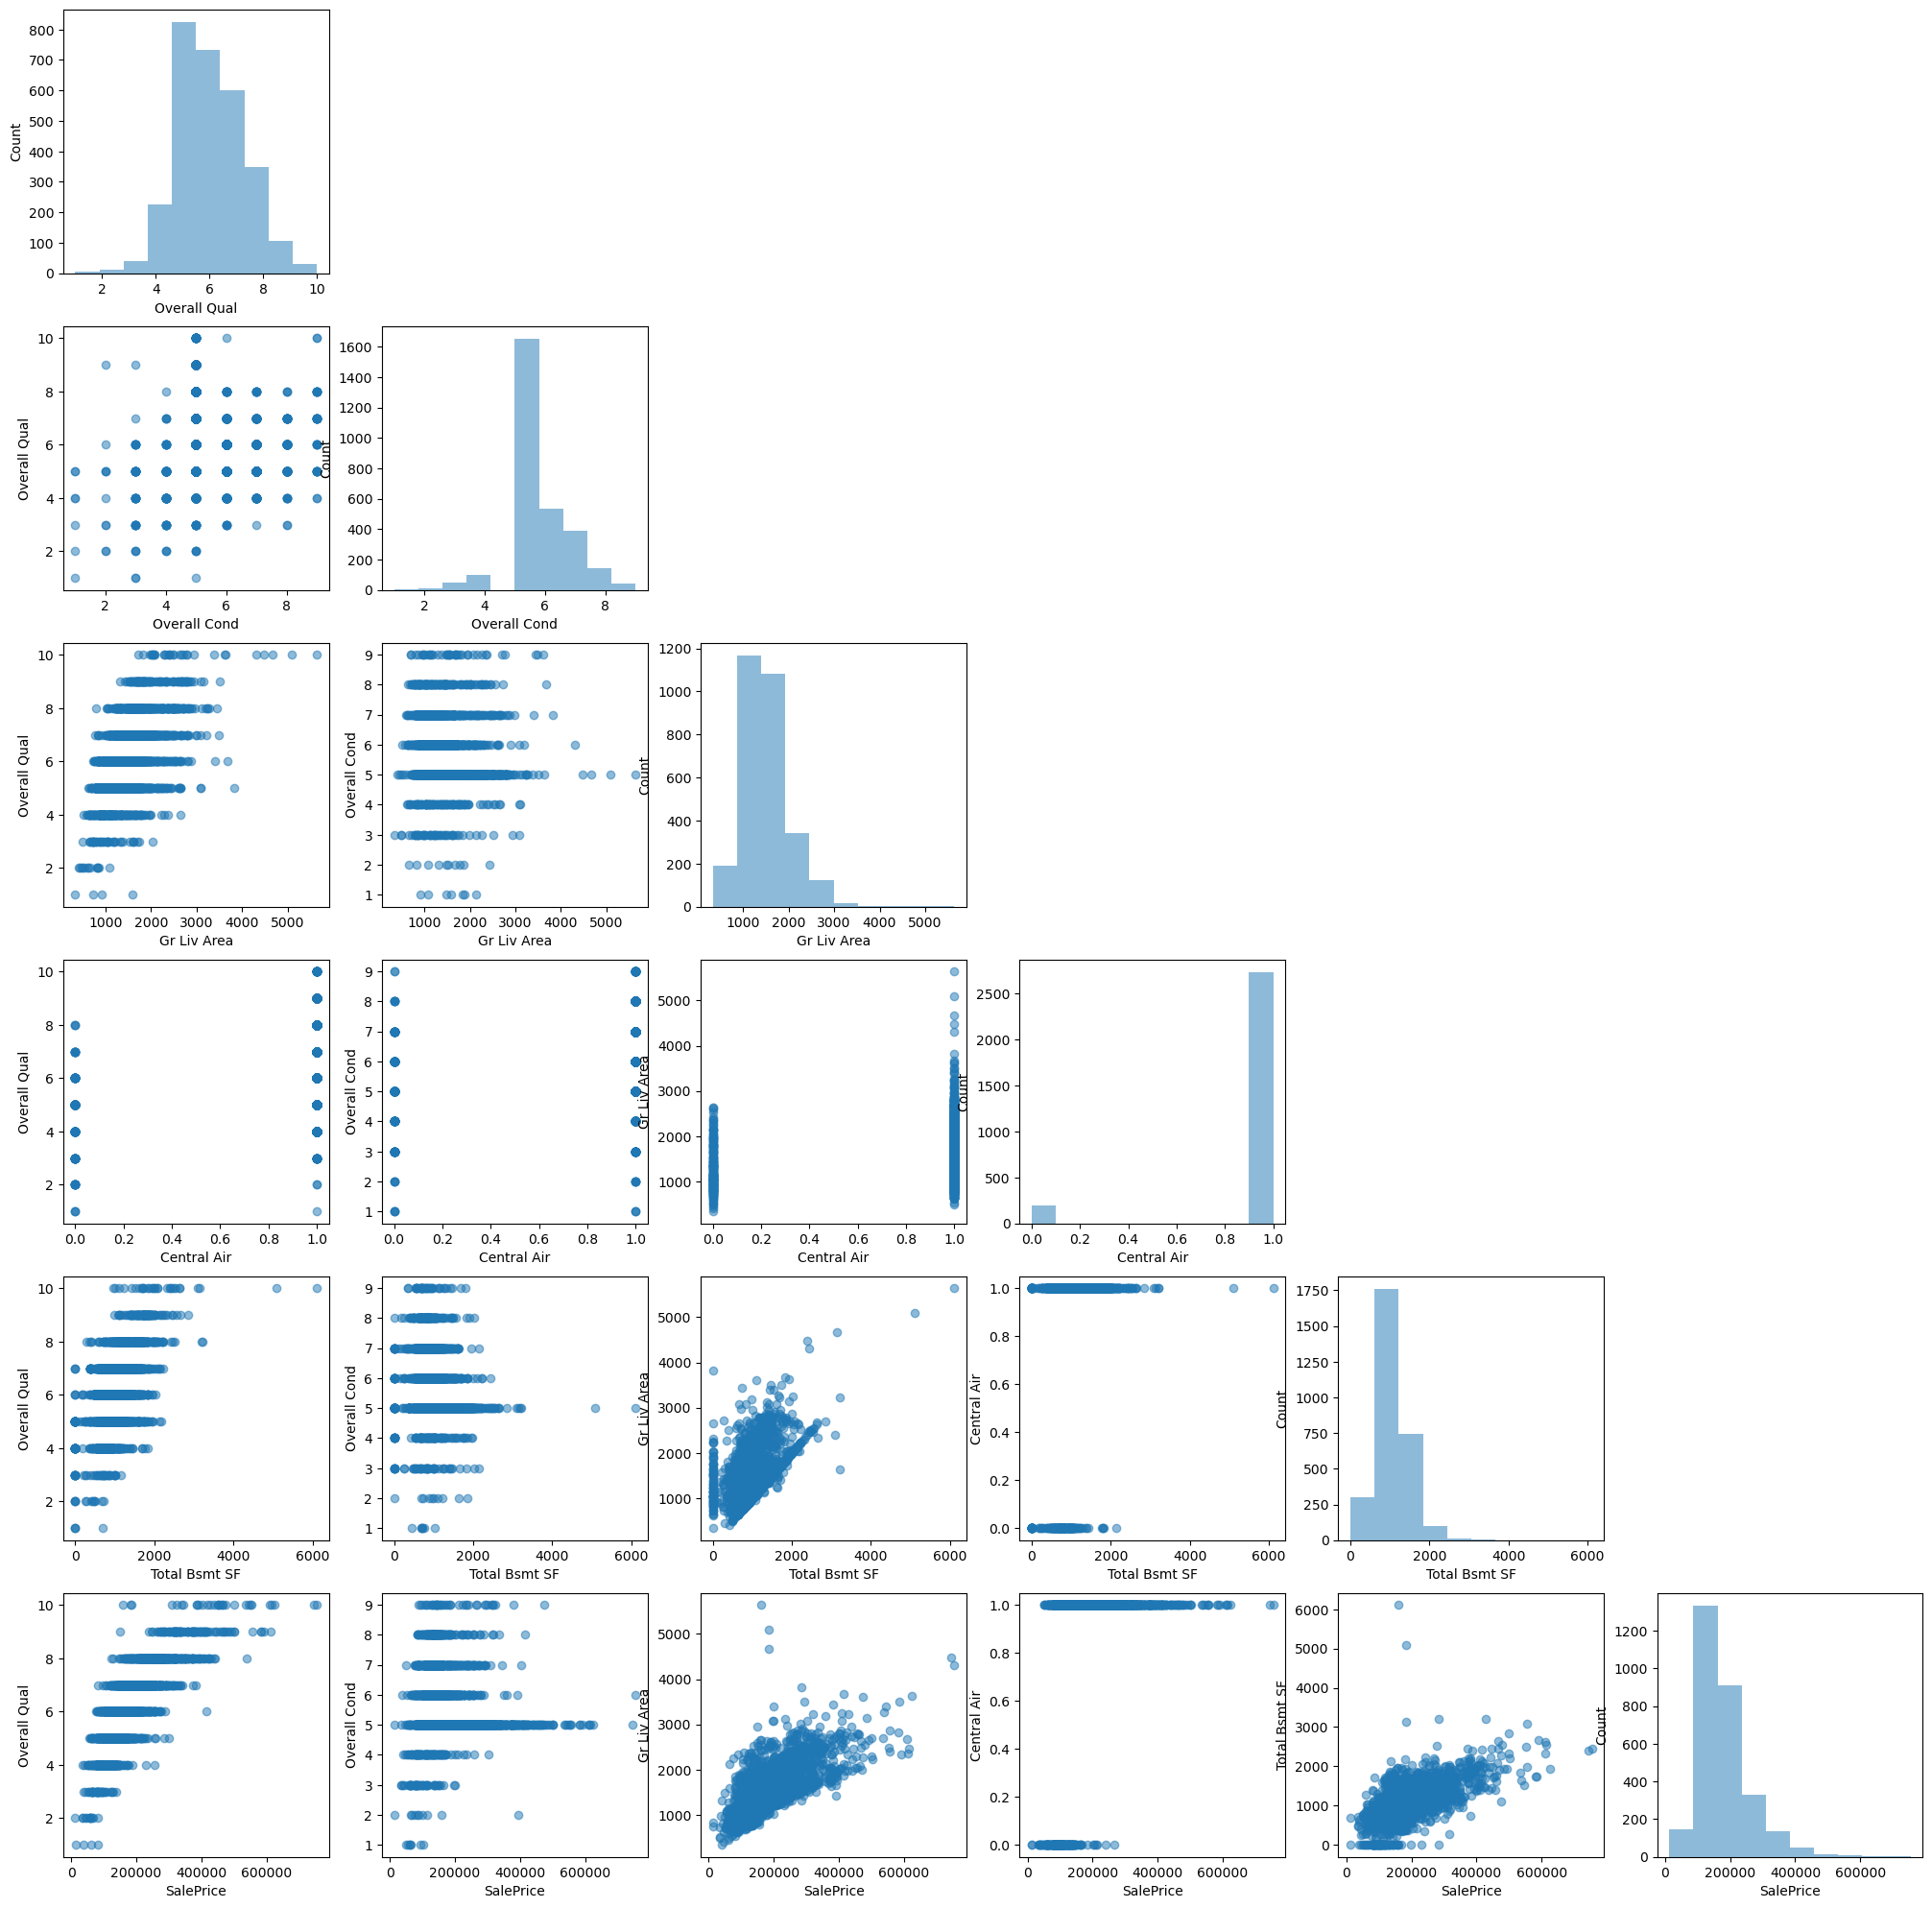

In [20]:
scatterplotmatrix(df.values, names=df.columns, alpha=0.5, figsize=(25, 25))
# The last figure in each row is a histogram of a feature
# The rest figures in each row are scattered plots of pairs of features.

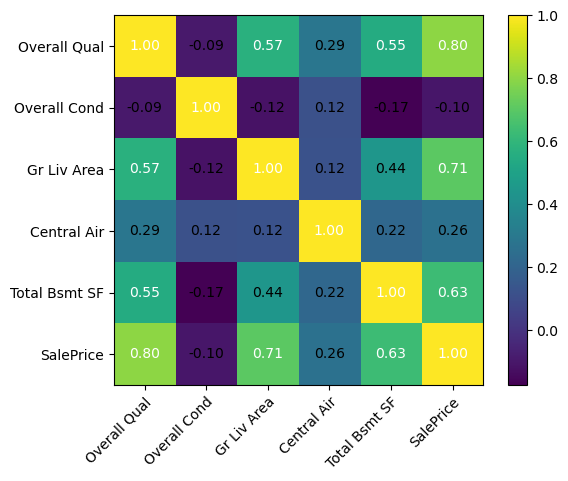

In [22]:
# Correlation between features
cm = np.corrcoef(df.values.T)
# np.correcoef treats each column as a training example. So we need to transpose the data matrix.
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)

In [23]:
# Manual implementation of linear regression
# Format: 
# X: 2D array, even if it has only a single column
# y: 1D array
# prediction: 1D array
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta # learning rate (step size in gradient descent)
        self.n_iter = n_iter # number of steps taken in gradient descent
        self.random_state = random_state # similar to a seed, used to randomly generate initial weights
        
    def fit(self, X, y):
        # Randomly generate initial weights
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = X.shape[1]) # The class attributes that are not initialized in __init__ are marked by an underscore at the end of the variable name.
        
        
        # Set initial bias to be 0
        #self.b_ = np.array([0.0]) #??? no need to use array
        self.b_ = 0.0
        
        # Use to store the loss at each iteration
        self.losses_ = []
        
        # Number of training examples
        num_examples = X.shape[0]
        
        # Gradient descent
        for i in range(self.n_iter):
            # output = X.w+b
            output = self.net_input(X)
            # error = X.w+b-y
            error = output - y
            # pLpw = (X.w+b-y).X/m
            self.w_ -= self.eta * np.dot(error, X)/num_examples
            self.b_ -= self.eta * np.mean(error)
            loss = np.mean(error**2)/2
            self.losses_.append(loss)
       
        return self
      
    def net_input(self, X):
        # the return is a 1D array
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return self.net_input(X)

In [24]:
X = df['Gr Liv Area'].values
y = df['SalePrice'].values

In [25]:
X.shape

(2929,)

In [15]:
# There is one subtlety here. When using X = df['Gr Liv Area'].values,
# the resulting X is a 1D array.
# However, the gradient descent algorithm requires that X to be a 2D array, even if it has only
# a single column.

In [26]:
df[['Gr Liv Area']].values # This is one way to create a column vector directly.b

array([[1656],
       [ 896],
       [1329],
       ...,
       [ 970],
       [1389],
       [2000]], dtype=int64)

In [27]:
# Or we can reshape X
X = X.reshape(-1,1)

In [28]:
# Although it is okay for y to be a 1D array, StandardScaler requires its input to be a 2D array,
# and its return is also a 2D array.
sc_y = StandardScaler()
y_std = sc_y.fit_transform(y.reshape(-1,1))

In [29]:
# In the gradient descent algorithm, we wrote the codes with y as a 1D array in mind.
# Therefore, we need to reshape the result of the standard scaler
y_std = y_std.flatten()

In [30]:
y_std.shape

(2929,)

In [31]:
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

In [32]:
X_std.shape # X_std is kept as a 2D array

(2929, 1)

In [33]:
lr = LinearRegressionGD(eta=0.1, n_iter=50, random_state=1)
lr.fit(X_std, y_std)

Text(0, 0.5, 'Loss')

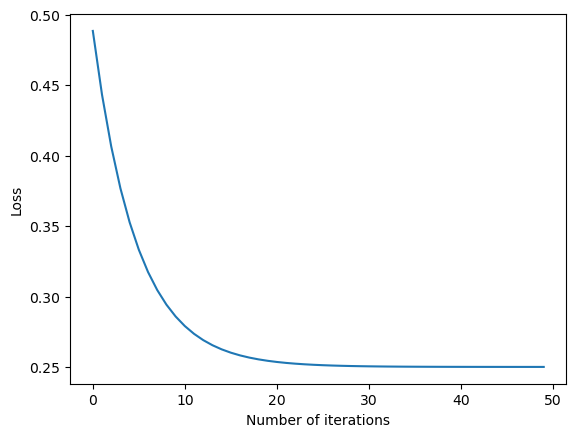

In [34]:
# Plot the losses
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(range(lr.n_iter), lr.losses_)
ax.set_xlabel("Number of iterations")
ax.set_ylabel("Loss")

In [35]:
# Visualization of the result
def lin_regplot(X, y, model):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.scatter(X, y, color="blue", edgecolor="white")
    ax.plot(X, model.predict(X), color="black")

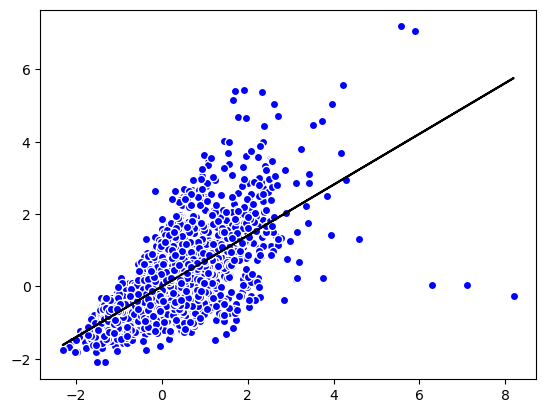

In [36]:
lin_regplot(X_std, y_std, lr)

In [37]:
# Prediction
feature = 2500
feature_std = sc_x.transform(np.array([[feature]]))
target_std = lr.predict(feature_std)
target = sc_y.inverse_transform(target_std.reshape(-1, 1))

In [38]:
print(f'Predicted sales price: {target.flatten()[0]:.2f}')

Predicted sales price: 291946.29


## Sklearn implementation of linear regression

In [39]:
slr = LinearRegression()
slr.fit(X,y)
y_pred = slr.predict(X)

In [40]:
print(f'Weight: {slr.coef_[0]}')
print(f'Biase: {slr.intercept_}')

Weight: 111.66625842136439
Biase: 13342.978662354813


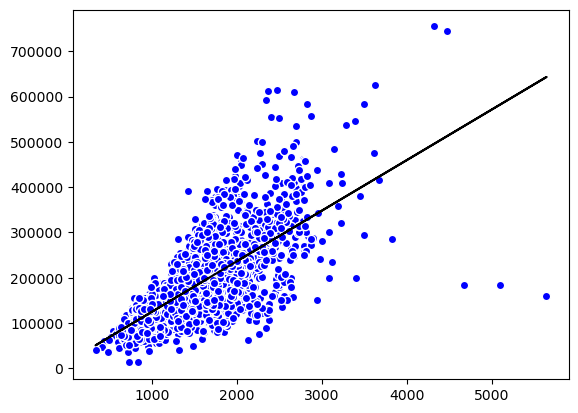

In [41]:
lin_regplot(X, y, slr)

## RANSAC

In [42]:
ransac = RANSACRegressor(
    LinearRegression(),
    max_trials=100,
    min_samples=0.95,
    residual_threshold=None,
    random_state=1
)
# min_samples=0.95: At each iteration, 95% of data is selected
# max_trials=100: total 100 iterations



ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=0.95,
                random_state=1)

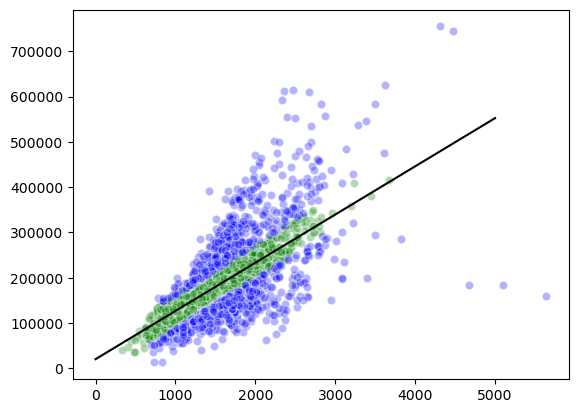

In [43]:
# Plot the inliers and outliers
imk = ransac.inlier_mask_ # A boolean array for inliers
omk = np.logical_not(imk) # A boolean array for outliers

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X[imk], y[imk], label="Inliers", color="green", edgecolor='white', alpha=0.3)
ax.scatter(X[omk], y[omk], label="Outliers", color="blue", edgecolor='white', alpha=0.3)

line_X = np.linspace(0, 5000, 5+1)
line_y = ransac.predict(line_X.reshape(-1,1))

ax.plot(line_X, line_y, color="black")

In [44]:
# Predicted parameters by RANSAC
print(f'Weight: {ransac.estimator_.coef_[0]}')
print(f'Weight: {ransac.estimator_.intercept_}')

Weight: 106.50882724081647
Weight: 20070.625842043344


## Model Evaluation

In [45]:
target_label = 'SalePrice'
# Extract all features
features = df.columns[df.columns!=target_label]

X = df[features].values
y = df[target_label].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [48]:
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

In [49]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Text(0, 0.5, 'residual')

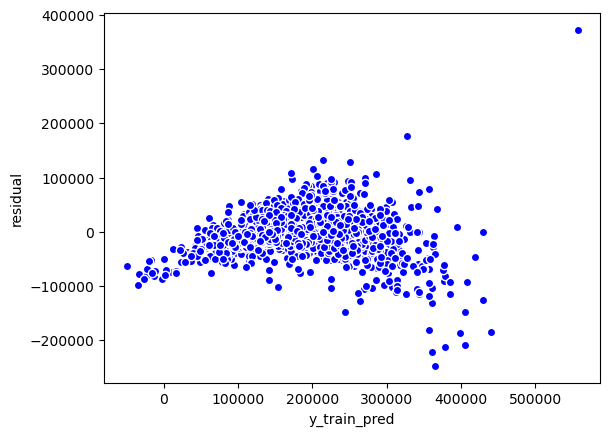

In [50]:
# Residual plot 
# For the training data
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_train_pred, y_train_pred-y_train, color="blue", edgecolors="white")
ax.set_xlabel("y_train_pred")
ax.set_ylabel("residual")

Text(0, 0.5, 'residual')

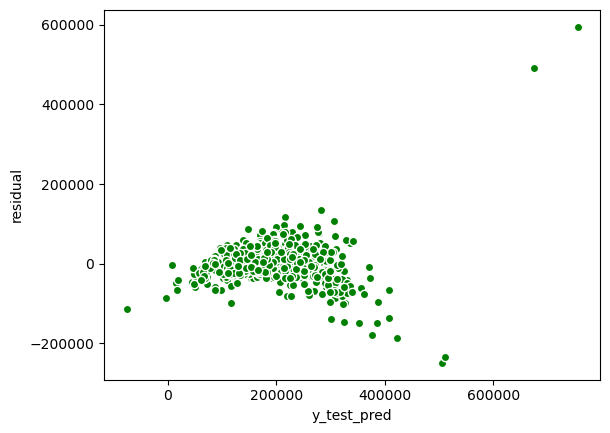

In [51]:
# For the test data
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_test_pred, y_test_pred-y_test, color="green", edgecolors="white")
ax.set_xlabel("y_test_pred")
ax.set_ylabel("residual")

In [52]:
# Mean square error
mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
print(f'MSE train: {mse_train}')
print(f'MSE test: {mse_test}')

MSE train: 1313405820.6476629
MSE test: 1986594849.9458873


In [53]:
# Mean absolute error
mae_train = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
mae_test = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
print(f'MAE train: {mae_train}')
print(f'MAE test: {mae_test}')

MAE train: 25362.21231904011
MAE test: 26416.254528965972


In [54]:
# Coefficient of determination
train_r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
test_r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
print(f'R2 train: {train_r2:.2f}')
print(f'R2 test: {test_r2:.2f}')

R2 train: 0.79
R2 test: 0.71


## Regularization

In [55]:
# Ridge: L2
# Lasso: L1
# Elastic net: L1 + L2
rdg = Ridge(alpha=10.0)
rdg.fit(X_train, y_train)
y_train_pred = rdg.predict(X_train)
y_test_pred = rdg.predict(X_test)
# Mean square error
mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
print(f'MSE train: {mse_train}')
print(f'MSE test: {mse_test}')
# Mean absolute error
mae_train = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
mae_test = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
print(f'MAE train: {mae_train}')
print(f'MAE test: {mae_test}')
# Coefficient of determination
train_r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
test_r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
print(f'R2 train: {train_r2:.2f}')
print(f'R2 test: {test_r2:.2f}')

# Lasso and elastic net can be implemented in a similar way

MSE train: 1313431685.326053
MSE test: 1989130344.0452714
MAE train: 25358.526873179017
MAE test: 26418.363694051815
R2 train: 0.79
R2 test: 0.71


## Polynomial regression

In [56]:
# A toy problem
X = np.array([258, 270, 294, 320, 342, 368, 396, 446, 480, 586]).reshape(-1, 1)
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [57]:
# Linear regression
lr = LinearRegression()
lr.fit(X,y)
X_fit = np.arange(250, 600, 10).reshape(-1, 1)
y_lin_fit = lr.predict(X_fit)

In [58]:
# Quadratic regression
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [59]:
X_quad

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

Note that the transformed data contains 3 columns when we specify degree=2. However, to do quadratic fitting, we only need one additional column for $x^2$. The first column is for $w_0$, so that it contains all 1's.

In [60]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

In [61]:
pr.coef_

array([ 0.00000000e+00,  2.39893018e+00, -2.25020109e-03])

Note that the first coefficient is zero ($w_0=0$). In fact, we only need $w_0$ or $b$, they are both constants.

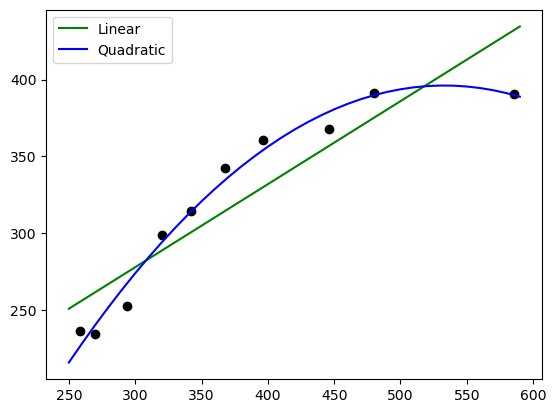

In [62]:
# Visualization
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_fit, y_lin_fit, label='Linear', color="green")
ax.plot(X_fit, y_quad_fit, label='Quadratic', color="blue")
ax.scatter(X, y, color="black")
ax.legend()

## Nonlinear regression for Ames Housing Dataset

In [63]:
# Remove outliers
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
X = X[df['Gr Liv Area']<4000]
y = y[df['Gr Liv Area']<4000]

In [64]:
lr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [65]:
lr.fit(X, y)
y_pred = lr.predict(X)

In [66]:
X_fit = np.arange(X.min(), X.max(), 1).reshape(-1, 1)
y_lin_fit = lr.predict(X_fit)
r2_linear = r2_score(y, y_pred)

In [67]:
lr.fit(X_quad, y)
y_pred = lr.predict(X_quad)
y_quad_fit = lr.predict(quadratic.fit_transform(X_fit))
r2_quad = r2_score(y, y_pred)

In [68]:
lr.fit(X_cubic, y)
y_pred = lr.predict(X_cubic)
y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))
r2_cubic = r2_score(y, y_pred)

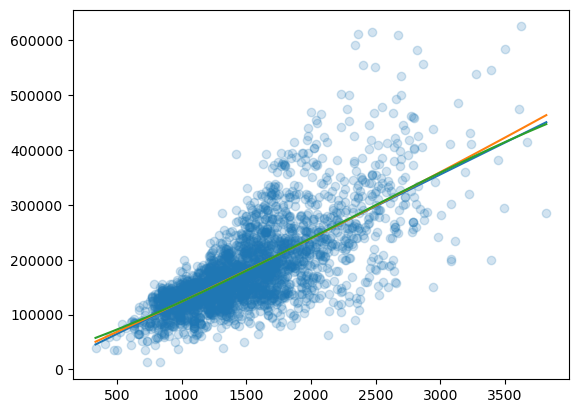

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X_fit, y_lin_fit, label=f"Linear R2={r2_linear}")
ax.plot(X_fit, y_quad_fit, label=f"Quadratic R2={r2_quad}")
ax.plot(X_fit, y_cubic_fit, label=f"Cubic R2={r2_cubic}")
ax.scatter(X, y, alpha=0.2)